VI DU VE BAi TOAN PHAN LOAI

In [1]:
#khai báo thư viện
from sklearn.datasets import load_breast_cancer#dữ liệu bệnh ung thư vú trong datasets
from sklearn.ensemble import RandomForestClassifier#thư viện mô hình phân loại rừng ngẫu nhiên 
from sklearn.model_selection import train_test_split #dùng tách bộ dữ liệu
from sklearn import metrics #để đánh giá các thông số hiệu suất mô hình
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') 

In [2]:
#tải dữ liệu vào data
data=load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
#khởi tạo các tính năng và nhãn
X=pd.DataFrame(data['data'],columns=data['feature_names'])
y=abs(pd.Series(data['target'])-1)

In [4]:
#tách bộ dữ liệu train 80% test 20%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [5]:
#khởi tạo mô hình
model = RandomForestClassifier(random_state=1)
#huấn luyện mô hình
model.fit(X_train, y_train)
#khởi tạo mảng preds dự đoán dữ liệu test
preds = model.predict(X_test) 

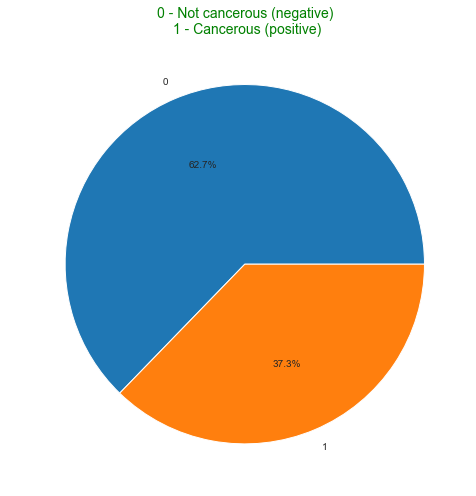

In [6]:
#trực quan hoá dữ liệu nhãn
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not cancerous (negative)\n 1 - Cancerous (positive)', size=14, c='green')
plt.tight_layout(); plt.show() 

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


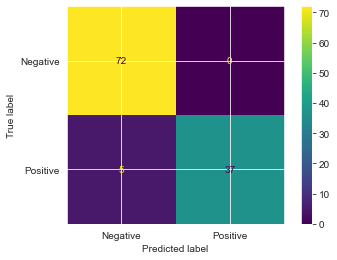

In [7]:
#trực quan thống kê kết quả dự đoán của mô hình:các positive và negative
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'])

In [8]:
#thống kê kết quả dự đoán của mô hình
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel() 

array([72,  0,  5, 37], dtype=int64)

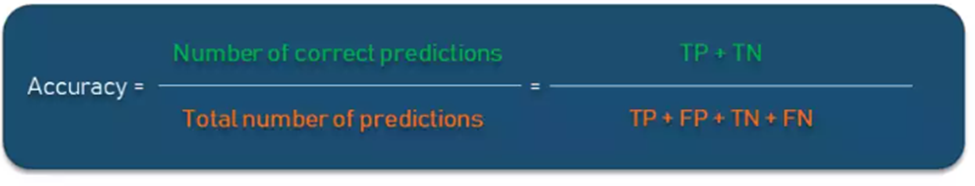

In [18]:
#thông số accuracy
accuracy = metrics.accuracy_score(y_test, preds)

In [19]:
accuracy

0.956140350877193

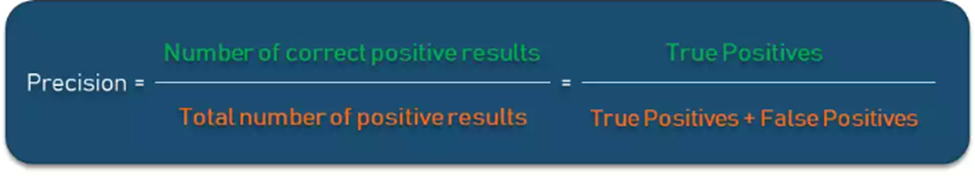

In [20]:
#thông số precision cho nhãn cancerous
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
#thông số precision cho nhãn not cancerous
precision_negative = metrics.precision_score(y_test, preds, pos_label=0)
precision_positive, precision_negative 

(1.0, 0.935064935064935)

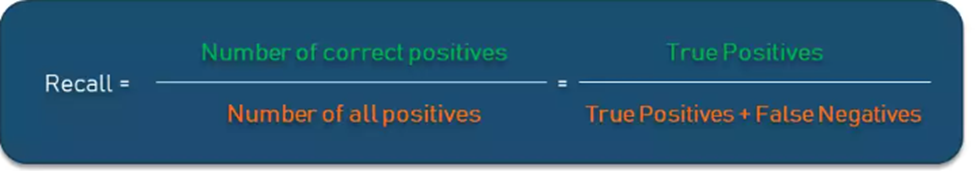

In [21]:
#thông số recall cho nhãn cancerous
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
#thông số recall cho nhãn not cancerous
recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
recall_sensitivity, recall_specificity

(0.8809523809523809, 1.0)

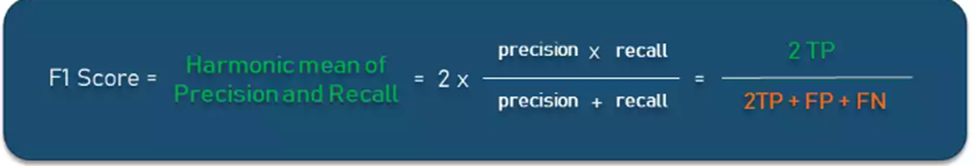

In [22]:
#thông số f1_score cho nhãn cancerous
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
#thông số f1_score cho nhãn not cancerous
f1_negative = metrics.f1_score(y_test, preds, pos_label=0)
f1_positive, f1_negative

(0.9367088607594937, 0.9664429530201343)

In [23]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.063000,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.1312,0.36350,0.32190,0.11080,0.2827,0.09208
47,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.1786,0.41660,0.50060,0.20880,0.3900,0.11790
292,12.950,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.033700,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.1483,0.20680,0.22410,0.10560,0.3380,0.09584
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.058140,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938
414,15.130,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.027390,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.109700,0.1966,0.07069,...,18.79,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.043750,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.1482,0.43650,1.25200,0.17500,0.4228,0.11750
448,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.029250,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463


In [24]:
y_test

421    0
47     1
292    0
186    1
414    1
      ..
172    1
3      1
68     0
448    0
442    0
Length: 114, dtype: int32

In [25]:
prediction=model.predict(X_test)

In [26]:
prediction,y_test

(array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0]),
 421    0
 47     1
 292    0
 186    1
 414    1
       ..
 172    1
 3      1
 68     0
 448    0
 442    0
 Length: 114, dtype: int32)

VI DU BAI TOAN HOI QUY

In [27]:
#khai báo thư viện
from sklearn.datasets import load_boston#dữ liệu tải là bộ boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #dùng mô hình hồi quy tuyến tính

In [28]:
x,y=load_boston(return_X_y=True)#tải dữ liệu 

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)#tách dữ liệu train 80% test 20%

In [30]:
model=LinearRegression().fit(x_train,y_train)#huấn luyện mô hình vs dữ liệu train

In [31]:
model.score(x_test,y_test)

0.5892223849182507

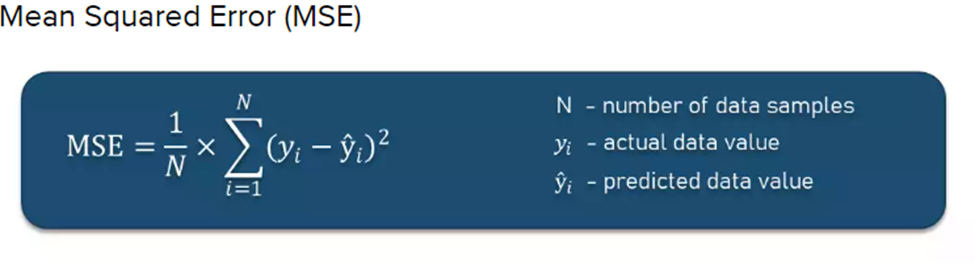

In [33]:
#thông số MSE
metrics.mean_squared_error(model.predict(x_test),y_test)

33.44897999767653

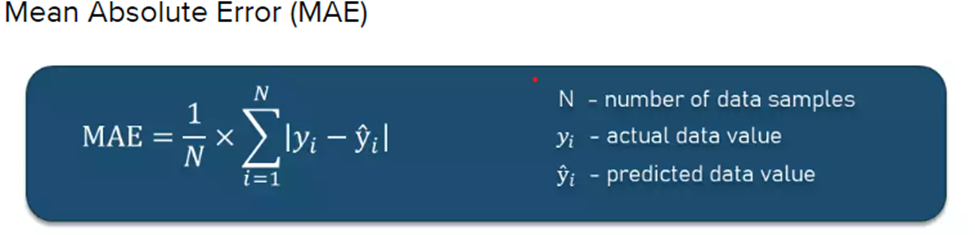

In [35]:
#thông số MAE
metrics.mean_absolute_error(model.predict(x_test),y_test)

3.842909220444498